<a href="https://colab.research.google.com/github/mohammadRahimi1993/BigData/blob/main/DataStructure_FinalProj_Phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wordcloud;
!pip install textacy;
!pip install spacytextblob;
!python -m textblob.download_corpora;
!python -m spacy download en_core_web_sm;

     |████████████████████████████████| 200 kB 20.1 MB/s 
     |████████████████████████████████| 481 kB 48.1 MB/s 
     |████████████████████████████████| 132 kB 46.1 MB/s 
     |████████████████████████████████| 6.2 MB 25.8 MB/s 
     |████████████████████████████████| 2.0 MB 32.7 MB/s 
     |████████████████████████████████| 457 kB 43.9 MB/s 
     |████████████████████████████████| 181 kB 37.9 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 10.1 MB 33.2 MB/s 
     |████████████████████████████████| 653 kB 46.8 MB/s 
     |████████████████████████████████| 58 kB 5.1 MB/s 
  Created wheel for cytoolz: filename=cytoolz-0.11.2-cp37-cp37m-linux_x86_64.whl size=1230816 sha256=04986f7a9a35480c34518dfe50c749296adddbb872550117cda498d0b0e11dc6
  Stored in directory: /root/.cache/pip/wheels/38/70/71/ca13ea3d36ccd0b3d0ec7d7a4ca67522048d695b556bba4f59
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp37-cp37m-linux_x86_64.whl size=740

# **1. Knowledge Graphs - Data Preprocessing**
# **1.1. Load Data**

In [6]:
import pandas as pd
articles = pd.read_csv('/content/drive/MyDrive/DataSet/TextMining_Rahimi.csv',encoding='cp1252')
print(articles.shape)
articles

(120, 7)


,ID,Title,Authors list,Abstract,Keywords,YearsOfRepublication,Journal
0,1.0,Analytical View of Web Security and Sophistica...,"Asst. Lect. MSc. IT, Eng. Tamara Saad Mohamed",All kind of business web application vulnerabi...,"Web application security, internet,security th...",2020.0,JPCS
1,2.0,Implementation of Web Server Security Against ...,"Mohammad Idhom, Ronggo Alit, and Akhmad Fauzi",Denial of Service (DoS) is one of the top cybe...,"network security, DoS attack, web server, con...",2021.0,JPCS
2,3.0,Analysis of denial of service attack on web se...,"S. Iswandi Walad1, Muhammad Zarlis1 , M.IT Sya...","In this study, an analysis of the Web security...","Internet, web security system, Denial-of-Servi...",2020.0,JPCS
3,4.0,Nscanner: Vulnerabilities Detection Tool for W...,"R. Utaya Surian1, Nor Azlina Abd Rahman1 and Y...",Internet has been dominating the world nearly ...,"Web Application Vulnerabilities, Phishing Atta...",2020.0,JPCS
4,5.0,An improved Simhash algorithm based malicious ...,"Guangxuan Chen, Guangxiao Chen, Di Wu, Qiang L...",There are a large number of similar or even id...,NaN,2021.0,JPCS
...,...,...,...,...,...,...,...
115,116.0,A new access control scheme for Facebook-style...,"Jun Pang , Yang Zhang",The popularity of online social networks (OSNs...,"Social networks , Access control Privacy;Hybri...",2015.0,Computers & Security
116,117.0,An approach for profiling phishing activities,"Isredza Rahmi A.Hamid, Jemal H.Abawajy",Phishing attacks continue unabated to plague I...,"Cybersecurity , Information security , Network...",2014.0,Computers & Security
117,118.0,Information security incident management: Curr...,"Inger AnneT?ndela , Maria B.Line , Martin Gilj...",This paper reports results of a systematic lit...,"Information security, Incident management , In...",2014.0,Computers & Security
118,119.0,Ontology for attack detection: An intelligent ...,"Abdul Razzaq , Zahid Anwar",Conventional detection techniques struggle to ...,"Web application security, Ontology based intel...",2014.0,Computers & Security


# **1.2. Select Subset**

In [7]:
articles_selection = articles[articles['YearsOfRepublication'] >= 2005]
plots = articles_selection.Abstract
plots


0      All kind of business web application vulnerabi...
1      Denial of Service (DoS) is one of the top cybe...
2      In this study, an analysis of the Web security...
3      Internet has been dominating the world nearly ...
4      There are a large number of similar or even id...
                             ...                        
114    Phishing is a security threat which combines s...
115    The popularity of online social networks (OSNs...
116    Phishing attacks continue unabated to plague I...
117    This paper reports results of a systematic lit...
118    Conventional detection techniques struggle to ...
Name: Abstract, Length: 115, dtype: object

# 1.3. Split abstract Into Sentences

In [8]:
from textacy.extract import subject_verb_object_triples
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp('They are watching a movie')
iterator = subject_verb_object_triples(doc)
for it in iterator:
    print(it)

SVOTriple(subject=[They], verb=[are, watching], object=[movie])


In [9]:
phrases = []
for plot in plots.head(3000):
    phrases_all = plot.split('.')
    #strip() method is to remove the whitespace
    phrases_filtered = [p.strip() for p in phrases_all if p.strip() and len(p.strip()) > 3]
    phrases += phrases_filtered
phrases_filtered

['Conventional detection techniques struggle to keep up with the inherent complexity of web application design and hence the ever growing variety of attacks that can exploit it',
 'Security frameworks modeled using an ontological approach are a promising new line of defense that can be highly effective in detecting zero day and sophisticated web application attacks because they can capture the context of the contents of information such as HTML pages or in-line scripts and have the ability to filter these contents by taking into consideration their consequences to the target applications',
 'The goal of this article is to demonstrate how an ontology-engineering methodology may be systematically applied for designing and evaluating such security systems',
 'A detailed ontological model is shown that caters to the generalized working of web applications, the underlying communication protocols and attacks',
 'More specifically the proposed ontological model because it captures the context

# **1.4. Extract SVO Triples**

In [10]:
# 1.4. Extract triples: subject-verb-object (SVO)
from tqdm import tqdm
triples_raw = []

for i in tqdm(phrases[0:1000]):  # TODO: remove limited no. phrases
    iterator = subject_verb_object_triples(nlp(i))
    phrase_triples = []
    for svo in iterator:
        phrase_triples.append(svo)   
    triples_raw.append(phrase_triples)
triples_raw

100%|██████████| 793/793 [00:08<00:00, 96.19it/s]


[[],
 [SVOTriple(subject=[enterprise, web, applications], verb=[are, threatened], object=[webs])],
 [SVOTriple(subject=[paper], verb=[discuss], object=[way])],
 [SVOTriple(subject=[issue], verb=[could, be, fixed], object=[source, HTML, Purifier, library])],
 [SVOTriple(subject=[we], verb=[will, discuss], object=[security, threats, security])],
 [SVOTriple(subject=[that], verb=[grows, attacking], object=[company, agency, organization])],
 [SVOTriple(subject=[type], verb=[has], object=[damage])],
 [SVOTriple(subject=[attackers], verb=[deny], object=[it]),
  SVOTriple(subject=[users], verb=[can, not, access], object=[service])],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [SVOTriple(subject=[attack], verb=[was, carried], object=[data, traffic]),
  SVOTriple(subject=[attack], verb=[observing], object=[data, traffic])],
 [SVOTriple(subject=[test, results], verb=[use], object=[ping]),
  SVOTriple(subject=[target, web, server], ver

# 1.5. Lematize + Stem Triples

In [11]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus.reader.wordnet import VERB
lemmatizer = WordNetLemmatizer()

In [12]:
lemmatized_triples = []
lemmatized_stemmed_triples = []
stemmer = SnowballStemmer('english')

In [13]:
from nltk.stem import SnowballStemmer
def lemmatize_stemming(text):
    # lemmatize + stem a text
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

In [14]:
phrase_counter = 0
detected_counter = 0

for (phrase, phrase_triples) in zip(phrases, triples_raw):
    print('phrase triples:', phrase_triples)
    phrase_counter += 1
    if phrase_triples:
        detected_counter += 1
        for triple in phrase_triples:
            print('raw:', triple)
            # lemmatize 
            s = lemmatizer.lemmatize(str(triple[0]))
            o = lemmatizer.lemmatize(str(triple[2]))
            v = lemmatizer.lemmatize(str(triple[1][-1]), VERB)  # take last token in verb expression
            
            # lemmatize + stem
            lss = lemmatize_stemming(str(triple[0]))
            lso = lemmatize_stemming(str(triple[2]))
            lsv = lemmatize_stemming(str(triple[1][-1]))
            
            print('lemmatized: s:', s, ', o:', o, ', v:', v)
            print('lemmatized+stemmed: s:', lss, ', o:', lso, ', v:', lsv)
            
            lemmatized_triples.append([s.lower(), v.lower(), o.lower()])
            lemmatized_stemmed_triples.append([lss.lower(), lsv.lower(), lso.lower()])
    else:
        print('Could not detect triples in phrase:', phrase)
        lemmatized_triples.append([])
        lemmatized_stemmed_triples.append([])

phrase triples: []
Could not detect triples in phrase: All kind of business web application vulnerability statistics are growing in recent and new forms of hacker's attacks, such as Watering Hole Attack are appearing
phrase triples: [SVOTriple(subject=[enterprise, web, applications], verb=[are, threatened], object=[webs])]
raw: SVOTriple(subject=[enterprise, web, applications], verb=[are, threatened], object=[webs])
lemmatized: s: [enterprise, web, applications] , o: [webs] , v: threaten
lemmatized+stemmed: s: [enterprise, web, applications] , o: [webs] , v: threaten
phrase triples: [SVOTriple(subject=[paper], verb=[discuss], object=[way])]
raw: SVOTriple(subject=[paper], verb=[discuss], object=[way])
lemmatized: s: [paper] , o: [way] , v: discuss
lemmatized+stemmed: s: [paper] , o: [way] , v: discuss
phrase triples: [SVOTriple(subject=[issue], verb=[could, be, fixed], object=[source, HTML, Purifier, library])]
raw: SVOTriple(subject=[issue], verb=[could, be, fixed], object=[source, HT

In [15]:
print('Detection rate: ', (detected_counter / phrase_counter) * 100, '%')

Detection rate:  63.17780580075662 %


# **2. Create Graph**
# **2.1. Create SOV Pandas DataFrame**

In [16]:
# use only sentences with non-empty SOV triples
sources = []
relations = []
targets = []
for ep_item in lemmatized_stemmed_triples:
    # check found items are not empty
    if ep_item:
        print(ep_item)
        # append source/relation/target
        sources.append(ep_item[0])
        relations.append(ep_item[1])
        targets.append(ep_item[2])
# create DataFrame
kg_df = pd.DataFrame({'source': sources, 'target': targets, 'edge': relations})
kg_df.tail()


['[enterprise, web, applications]', 'threaten', '[webs]']
['[paper]', 'discuss', '[way]']
['[issue]', 'fix', '[source, html, purifier, library]']
['[we]', 'discuss', '[security, threats, security]']
['[that]', 'attack', '[company, agency, organization]']
['[type]', 'have', '[damage]']
['[attackers]', 'deni', '[it]']
['[users]', 'access', '[service]']
['[attack]', 'carri', '[data, traffic]']
['[attack]', 'observ', '[data, traffic]']
['[test, results]', 'use', '[ping]']
['[target, web, server]', 'send', '[request, time]']
['[internet]', 'domin', '[world]']
['[web, application]', 'know', '[to, be, the, most, widespread, platform, of, the, internet, especially, when, it, comes, to, share, resources, ,, e, -, commerce, services, ,, education, and, business]']
['[developer]', 'design', '[detection, feature]']
['[webpages]', 'caus', '[loss]']
['[criminals]', 'carri', '[activities]']
['[autours]', 'analyz', '[mainstream, detection, algorithms, deduplication, algorithms]']
['[autours]', 'propos

,source,target,edge
693,[it],[context],captur
694,[model],"[focus, only, on, specific, portions, of, the,...",help
695,[model],"[context, technologies]",captur
696,[which],"[correctness, accuracy, consistency, soundness...",includ
697,"[attack, detection, system]","[rate, rate]",show


# **2.2. Top Subjects (Sources)**

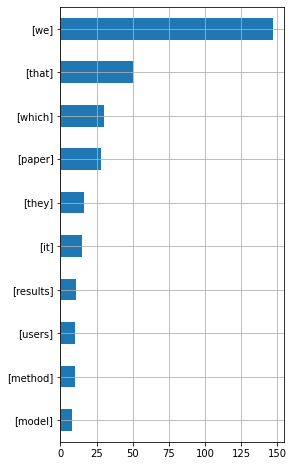

In [17]:
kg_df.source.value_counts()[:10].sort_values().plot.barh(figsize=(4,8), grid=True)

In [18]:
kg_df.source.value_counts()[:50]

[we]                     147
[that]                    50
[which]                   30
[paper]                   28
[they]                    16
[it]                      15
[results]                 11
[method]                  10
[users]                   10
[model]                    8
[research]                 7
[article]                  6
[jadeite]                  6
[%]                        6
[data]                     5
[system]                   5
[organizations]            5
[process]                  4
[study]                    4
[attacker]                 4
[evaluation]               4
[authors]                  4
[us]                       4
[workarounds]              4
[these]                    4
[researchers]              4
[algorithm]                4
[one]                      3
[this]                     3
[studies]                  3
[detection, method]        3
[people]                   3
[proposition]              3
[work]                     3
[findings]    

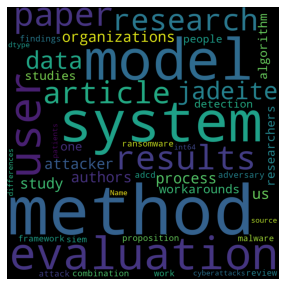

In [19]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = str(kg_df.source.value_counts()[:50]) 
text
wc = WordCloud().generate(text)
#plt.imshow(wc)
wc = WordCloud(width=1000, height=1000, background_color="Black", stopwords=STOPWORDS).generate(text)
plt.figure(figsize=(5, 5))
plt.axis("off")
plt.imshow(wc)

# **2.3. Top Objects (Targets)**

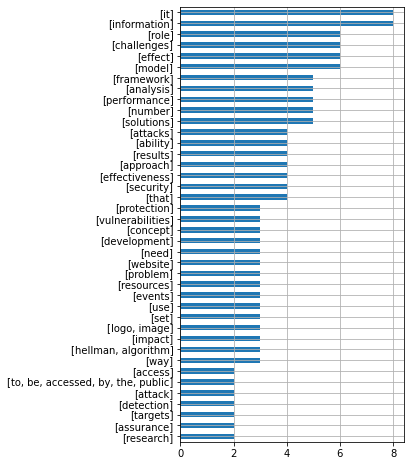

In [21]:
kg_df.target.value_counts()[:40].sort_values().plot.barh(figsize=(4,8), grid=True) 

In [22]:
kg_df.target.value_counts()[:50]

[it]                                                                                                        8
[information]                                                                                               8
[role]                                                                                                      6
[challenges]                                                                                                6
[effect]                                                                                                    6
[model]                                                                                                     6
[solutions]                                                                                                 5
[number]                                                                                                    5
[performance]                                                                                               5
[framework

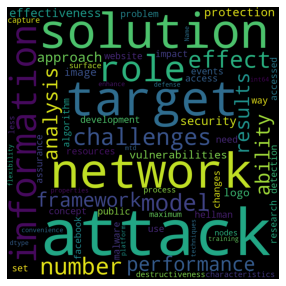

In [23]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = str(kg_df.target.value_counts()[:50]) 
text
wc = WordCloud().generate(text)
#plt.imshow(wc)
wc = WordCloud(width=1000, height=1000, background_color="Black", stopwords=STOPWORDS).generate(text)
plt.figure(figsize=(5, 5))
plt.axis("off")
plt.imshow(wc)

# **2.4. Top verbs (Edge/Relations)**

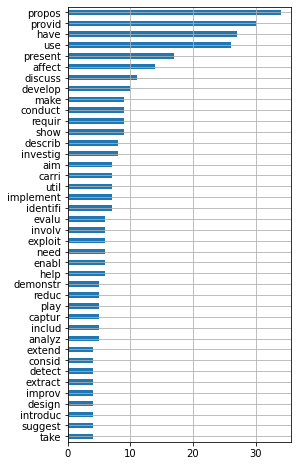

In [24]:
kg_df.edge.value_counts()[:40].sort_values().plot.barh(figsize=(4,8), grid=True)

In [25]:
kg_df.edge.value_counts()[:50]

propos       34
provid       30
have         27
use          26
present      17
affect       14
discuss      11
develop      10
requir        9
show          9
make          9
conduct       9
describ       8
investig      8
carri         7
util          7
implement     7
identifi      7
aim           7
evalu         6
help          6
involv        6
exploit       6
need          6
enabl         6
reduc         5
play          5
captur        5
includ        5
demonstr      5
analyz        5
suggest       4
introduc      4
design        4
extend        4
extract       4
detect        4
consid        4
improv        4
take          4
leak          4
compar        4
combin        3
share         3
generat       3
bring         3
do            3
address       3
facilit       3
result        3
Name: edge, dtype: int64

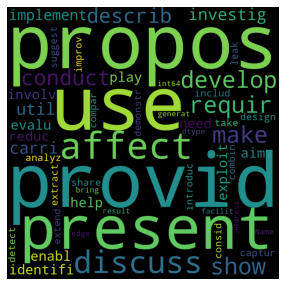

In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = str(kg_df.edge.value_counts()[:50]) 
text
wc = WordCloud().generate(text)
#plt.imshow(wc)
wc = WordCloud(width=1000, height=1000, background_color="Black", stopwords=STOPWORDS).generate(text)
plt.figure(figsize=(5, 5))
plt.axis("off")
plt.imshow(wc)

## **2.5. create a directed graph from a Pandas dataframe**

In [27]:
import networkx as nx
# create a directed graph from a Pandas dataframe
G = nx.from_pandas_edgelist(kg_df, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())
GH=nx.dfs_tree(G)

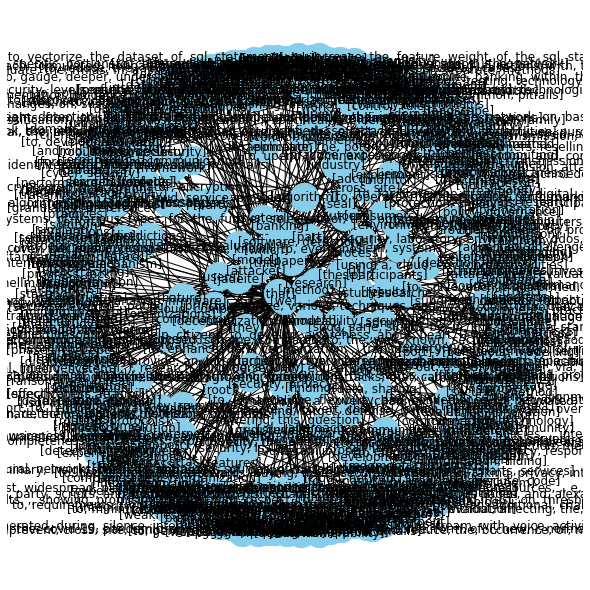

In [28]:
from matplotlib import pylab as plt
plt.figure(figsize=(8,8))
pos = nx.spring_layout(GH, k=0.5)  # k regulates the distance between nodes
nx.draw(GH, with_labels=True, node_color='skyblue', node_size=800, edge_cmap=plt.cm.Blues, pos=pos)
plt.show()

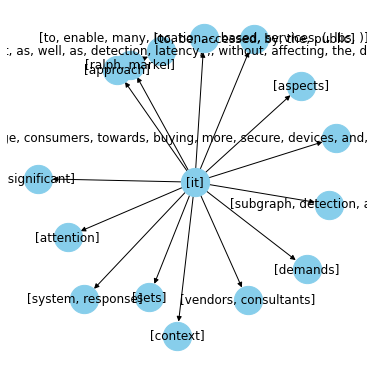

In [29]:
GI = nx.dfs_tree(G, source='[it]', depth_limit=2)
from matplotlib import pylab as plt
plt.figure(figsize=(5,5))
pos = nx.spring_layout(GI, k=0.5)  # k regulates the distance between nodes
nx.draw(GI, with_labels=True, node_color='skyblue', node_size=800, edge_cmap=plt.cm.Blues, pos=pos)
plt.show()

# **2.6. Find Links**

In [30]:
edge_attrs = [v['edge'] for k, v in G.get_edge_data('[it]', '[attention]').items()]
print(set(edge_attrs))
d = {x:edge_attrs.count(x) for x in set(edge_attrs)}
print(sorted(d.items(), key=lambda item: item[1], reverse=True))

{'attract'}
[('attract', 1)]


# **2.7. Depth First Search via NetworkX**

5


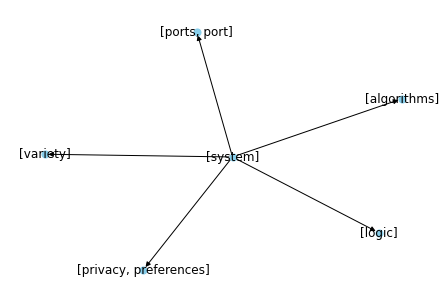

In [31]:
nx_SG = nx.dfs_tree(G, source='[system]', depth_limit=1)
print(len(list(nx_SG.edges())))
nx_SG.edges()
pos = nx.spring_layout(nx_SG, k=0.8)  # k regulates the distance between nodes
nx.draw(nx_SG, with_labels=True, node_color='skyblue', node_size=50, edge_cmap=plt.cm.Blues, pos=pos)

# **2.8. Visualization**

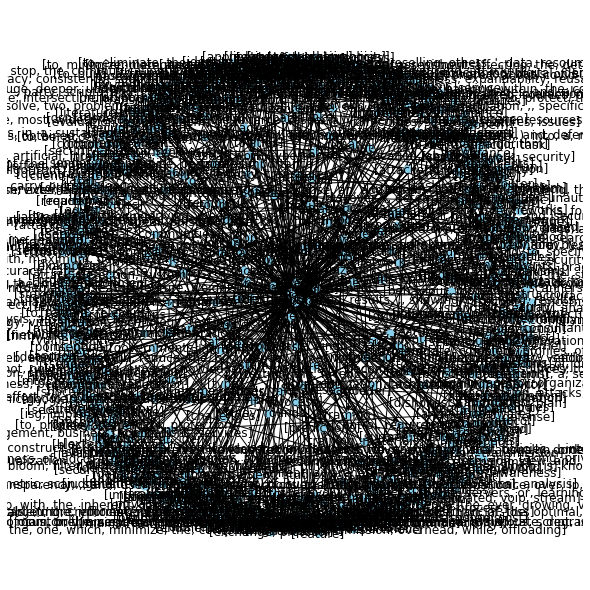

In [32]:
from matplotlib import pylab as plt
plt.figure(figsize=(8,8))
pos = nx.spring_layout(G, k=0.5)  # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=50, edge_cmap=plt.cm.Blues, pos=pos)
plt.show()

# **3 Embeding knowldge graph**

In [1]:
%%capture 
!pip install ampligraph;
!pip uninstall tensorflow -y

In [2]:
%tensorflow_version 1.x 
!pip install tensorflow  

TensorFlow 1.x selected.
  Using cached importlib_metadata-4.11.3-py3-none-any.whl (18 kB)
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=22b39265b845003a031edf8b938a3efc9a7e012f36a25ad33dc5a48020479065
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.2.0
    Uninstalling importlib-metadata-4.2.0:
      Successfully uninstalled importlib-metadata-4.2.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.2 which is incompatible.
flake8 4.0.1 require

In [3]:
%tensorflow_version 1.x 
import numpy as np
import pandas as pd
import ampligraph
ampligraph.__version__
import tensorflow as tf

In [4]:
from ampligraph.latent_features import ComplEx
model = ComplEx(batches_count=50,
                epochs=30,
                k=100,
                eta=20,
                optimizer='adam', 
                optimizer_params={'lr':1e-4},
                loss='multiclass_nll',
                regularizer='LP', 
                regularizer_params={'p':3, 'lambda':1e-5}, 
                seed=0, 
                verbose=True)

In [20]:
from ampligraph.evaluation import train_test_split_no_unseen 
X_train, X_valid = train_test_split_no_unseen(np.array(kg_df), test_size=10000,allow_duplication=True)

In [21]:
tf.logging.set_verbosity(tf.logging.ERROR)
model.fit(X_train)

Average ComplEx Loss:   2.819057: 100%|██████████| 30/30 [00:08<00:00,  3.49epoch/s]


In [22]:
model.predict(np.array([X_valid[0], X_valid[1]]))

array([0.0073532 , 0.00369858], dtype=float32)

In [23]:
model.get_embeddings(X_valid[3])

array([[-1.64768890e-01,  1.14491053e-01,  4.65886034e-02,
         1.53762281e-01,  1.16407178e-01,  1.36526078e-02,
        -2.14039208e-03, -4.10825871e-02,  6.67758137e-02,
         1.40118986e-01,  1.43065289e-01, -9.64210108e-02,
         9.00818780e-02, -2.11769100e-02, -5.28610237e-02,
         5.05271778e-02, -1.19965989e-02, -3.61593366e-02,
        -9.26397145e-02,  1.51760906e-01, -8.04890469e-02,
         6.67832568e-02,  1.26412004e-01, -2.49958001e-02,
         3.48243155e-02, -1.04922324e-01, -3.10483221e-02,
        -6.49741739e-02, -5.93278036e-02,  4.73574325e-02,
         9.92697012e-03,  5.60893714e-02,  1.54981881e-01,
        -2.42877379e-02,  8.33870769e-02,  9.12277848e-02,
        -1.24240443e-01, -2.10969090e-01, -1.21614970e-01,
         1.50555566e-01,  1.15666166e-01, -9.08722728e-02,
        -1.69592977e-01, -5.97945526e-02, -9.90312174e-02,
        -1.79303586e-01,  9.03285518e-02, -7.12652430e-02,
         7.80897960e-02,  3.07309325e-03, -7.80551732e-0

In [24]:
filter_triples = np.concatenate((X_train, X_valid))
from ampligraph.evaluation import evaluate_performance
ranks = evaluate_performance(X_valid,
                             model=model, 
                             filter_triples=filter_triples,
                             use_default_protocol=True,
                             verbose=True)

WARNING - DeprecationWarning: use_default_protocol will be removed in future. Please use corrupt_side argument instead.


100%|██████████| 10000/10000 [00:34<00:00, 288.82it/s]


In [25]:
from ampligraph.evaluation import mr_score, mrr_score, hits_at_n_score

mr = mr_score(ranks)
mrr = mrr_score(ranks)

print("MRR: %.2f" % (mrr))
print("MR: %.2f" % (mr))

hits_10 = hits_at_n_score(ranks, n=10)
print("Hits@10: %.2f" % (hits_10))
hits_3 = hits_at_n_score(ranks, n=3)
print("Hits@3: %.2f" % (hits_3))
hits_1 = hits_at_n_score(ranks, n=1)
print("Hits@1: %.2f" % (hits_1))

MRR: 0.08
MR: 246.74
Hits@10: 0.10
Hits@3: 0.07
Hits@1: 0.06
